In [1]:
%load_ext autoreload

%autoreload 2
import numpy as np
import corner, sys
import getdist
from getdist import plots, MCSamples
%matplotlib inline
import matplotlib.pyplot as plt
sys.path.append('../../modules/')
import numpy as np
#plt.switch_backend("Qt5Agg")

In [2]:
names = ['1', '2', '3', '4', '5', '6']
labels = [r'\ln \lambda_0', r'\mu_z', r'\mu_m', r'\sigma_{\ln \lambda, 0}', r'\sigma_z', r'\sigma_m']
settings={'mult_bias_correction_order':0,'smooth_scale_2D':4, 'smooth_scale_1D':4, 'boundary_correction_order':0}

In [3]:
n_cut=19000
name='1-halo=nfw+c-M=Duffy08_rmin=1.0-rmax=3.5_photoz=Truez_hmf=Despali16'
t = np.load(f'../chains/WLxN/MCMC_fit_m-r_WLxN_{name}.pkl', allow_pickle = True)
WLxN_true = MCSamples(samples=t['flat_chains'][n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label='true source redshifts')
name='1-halo=nfw+c-M=Duffy08_rmin=1.0-rmax=3.5_photoz=BPZ_hmf=Despali16'
t = np.load(f'../chains/WLxN/MCMC_fit_m-r_WLxN_{name}.pkl', allow_pickle = True)
WLxN_bpz = MCSamples(samples=t['flat_chains'][n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label='BPZ')

name='1-halo=nfw+c-M=Duffy08+lensing_bias_rmin=1.0-rmax=3.5_photoz=BPZ_hmf=Despali16'
t = np.load(f'../chains/WLxN/MCMC_fit_m-r_WLxN_{name}.pkl', allow_pickle = True)
WLxN_bpzb = MCSamples(samples=t['flat_chains'][n_cut:],names = names+['7'], 
                    labels = labels+['b'], 
                     settings=settings, 
                     label='BPZ (with factor 1+b)')

name='1-halo=nfw+c-M=Duffy08_rmin=1.0-rmax=3.5_photoz=flex_hmf=Despali16'
t = np.load(f'../chains/WLxN/MCMC_fit_m-r_WLxN_{name}.pkl', allow_pickle = True)
WLxN_flex = MCSamples(samples=t['flat_chains'][n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label='FlexZBoost')
name='1-halo=nfw+c-M=Duffy08+lensing_bias_rmin=1.0-rmax=3.5_photoz=flex_hmf=Despali16'
t = np.load(f'../chains/WLxN/MCMC_fit_m-r_WLxN_{name}.pkl', allow_pickle = True)
WLxN_flexb = MCSamples(samples=t['flat_chains'][n_cut:],names = names+['7'], 
                    labels = labels+['b'], 
                     settings=settings, 
                     label='FlexZBoost (with factor 1+b)')

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


In [4]:
print(np.mean(WLxN_bpzb.samples[:,6]), np.std(WLxN_bpzb.samples[:,6]))

-0.021469339450434752 0.033716398902018364


In [5]:
print(np.mean(WLxN_flexb.samples[:,6]), np.std(WLxN_flexb.samples[:,6]))

0.019928448410399476 0.03358901041711867


In [6]:
params_fid=[3.345953364933381,
 0.06378674560099672,
 2.2274595352385975,
 0.5634900828247924,
 -0.04529427946062734,
 0.09764409931399064]

In [7]:
markers={f'{i+1}':params_fid[i] for i in range(len(params_fid))}

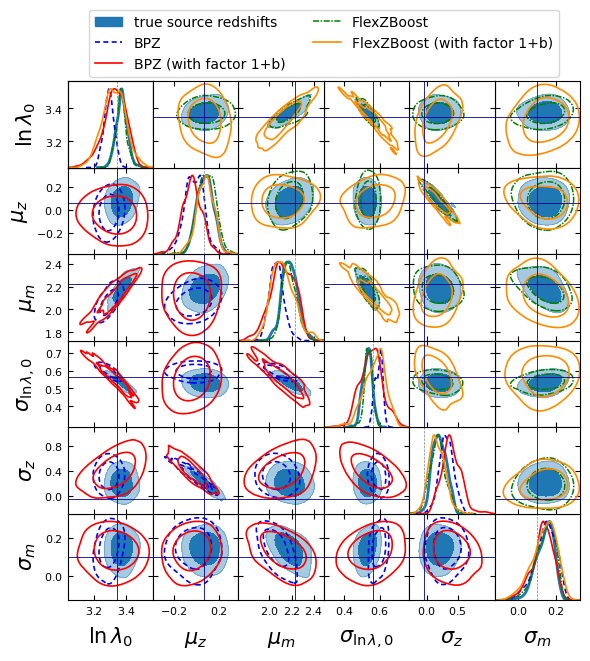

In [16]:
g = plots.get_subplot_plotter(subplot_size=1)
g.settings.lab_fontsize = 20
g.settings.legend_fontsize = 15
g.settings.figure_legend_ncol = 2
g.settings.axes_fontsize = 13
marker_args = {'lw':0.6, 'markersize':0.75, 'ls':'-','color':'darkblue'}
range_ = {'1':[3.1,3.6], '2':[-0.25,0.45], '3':[1.8,2.6], '4':[0.4,0.7],'5':[-0.6,0.6], '6':[-0.1,0.4]}
g.triangle_plot(
                [WLxN_true, WLxN_bpz,WLxN_bpzb, ], 
                filled=[True, False, False, False, False], 
                shaded=False, 
                contour_colors = ['C0', 'b', 'r', ], 
                contour_ls=['-','--','-', '-', '-'],
                contour_lws=[2,1.2,1.2,1,2],
                legend_fontsize = 10,
                #param_limits=range_,
                params=['1','2','3','4','5','6',],markers=markers,
                fine_bins = 1,  marker_args = marker_args,
                upper_roots = [WLxN_true, WLxN_flex,WLxN_flexb],
                upper_kwargs = {    'filled':[True, False, False, False, False],
                                    'shaded':False, 
                                    'contour_colors':['C0','green','darkorange'], 
                                    'contour_lws':[1.2,1.1,1.2],
                                    'contour_ls':['-','-.','-']})
plt.savefig(f'../fig/impact_photoz_bpz.png', dpi = 300, bbox_inches='tight',)

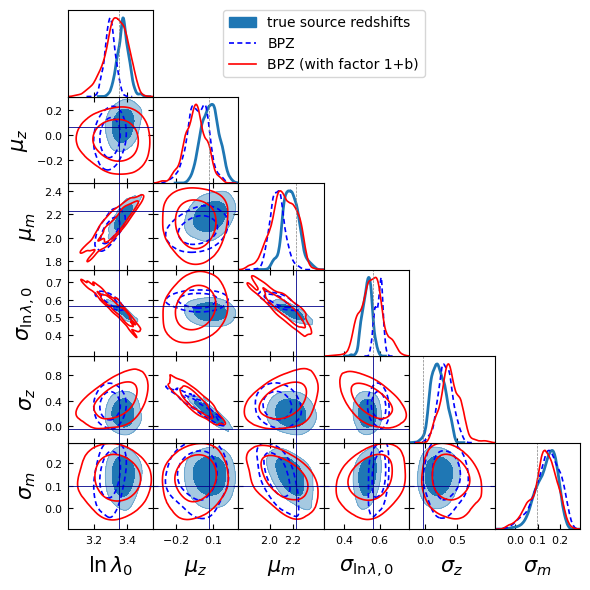

In [10]:
g = plots.get_subplot_plotter(subplot_size=1)
g.settings.lab_fontsize = 20
g.settings.legend_fontsize = 15
g.settings.figure_legend_ncol = 1
g.settings.axes_fontsize = 13
marker_args = {'lw':0.6, 'markersize':0.75, 'ls':'-','color':'darkblue'}
range_ = {'1':[3.1,3.6], '2':[-0.25,0.45], '3':[1.8,2.6], '4':[0.4,0.7],'5':[-0.6,0.6], '6':[-0.1,0.4]}
g.triangle_plot(
                [WLxN_true, WLxN_bpz,WLxN_bpzb, ], 
                filled=[True, False, False, False, False], 
                shaded=False, 
                contour_colors = ['C0', 'b', 'r', ], 
                contour_ls=['-','--','-', '-', '-'],
                contour_lws=[2,1.2,1.2,1,2],
                legend_fontsize = 10,
                #param_limits=range_,
                params=['1','2','3','4','5','6',],markers=markers,
                fine_bins = 1,  marker_args = marker_args,
)
plt.savefig(f'../fig/impact_photoz_bpz.png', dpi = 300, bbox_inches='tight',)

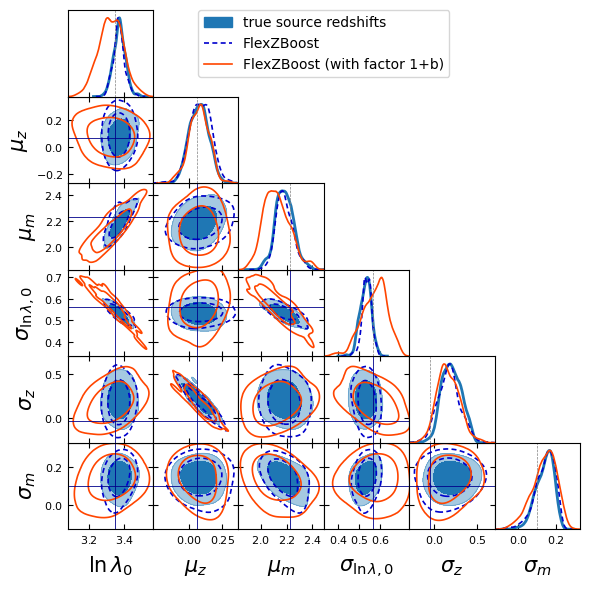

In [16]:
g = plots.get_subplot_plotter(subplot_size=1)
g.settings.lab_fontsize = 20
g.settings.legend_fontsize = 15
g.settings.figure_legend_ncol = 1
g.settings.axes_fontsize = 13
marker_args = {'lw':0.6, 'markersize':0.75, 'ls':'-','color':'darkblue'}
range_ = {'1':[3.1,3.6], '2':[-0.25,0.45], '3':[1.8,2.6], '4':[0.4,0.7],'5':[-0.6,0.6], '6':[-0.1,0.4]}
g.triangle_plot(
                [WLxN_true, WLxN_flex,WLxN_flexb], 
                filled=[True, False, False, False, False], 
                shaded=False, 
                contour_colors = ['C0','mediumblue','orangered'], 
                contour_ls=['-','--','-'],
                contour_lws=[2,1.2,1.2,1,2],
                legend_fontsize = 10,
                #param_limits=range_,
                params=['1','2','3','4','5','6',],markers=markers,
                fine_bins = 1,  marker_args = marker_args,
)
plt.savefig(f'../fig/impact_photoz_flex.png', dpi = 300, bbox_inches='tight',)